In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-prediction-dataset/Breast_cancer_data.csv')

x = df['diagnosis']
y = df.drop('diagnosis', axis=1)
x_treino, x_teste = x[0:300].values, x[300:].values
y_treino, y_teste = y[0:300].values, y[300:].values
df.iloc[50:61]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
50,11.760,21.60,74.72,427.9,0.08637,1
51,13.640,16.34,87.21,571.8,0.07685,1
52,11.940,18.24,75.71,437.6,0.08261,1
53,18.220,18.70,120.30,1033.0,0.11480,0
54,15.100,22.02,97.26,712.8,0.09056,0
55,11.520,18.75,73.34,409.0,0.09524,1
56,19.210,18.57,125.50,1152.0,0.10530,0
57,14.710,21.59,95.55,656.9,0.11370,0
58,13.050,19.31,82.61,527.2,0.08060,1
59,8.618,11.79,54.34,224.5,0.09752,1


## PCA

In [3]:
U, S, V = np.linalg.svd(y_treino)
print(U.shape)
print(S.shape)
print(V.shape)

pc1, pc2, pc3, pc4, pc5 = V[:,0], V[:,1], V[:,2], V[:,3], V[:,4]

(300, 300)
(5,)
(5, 5)


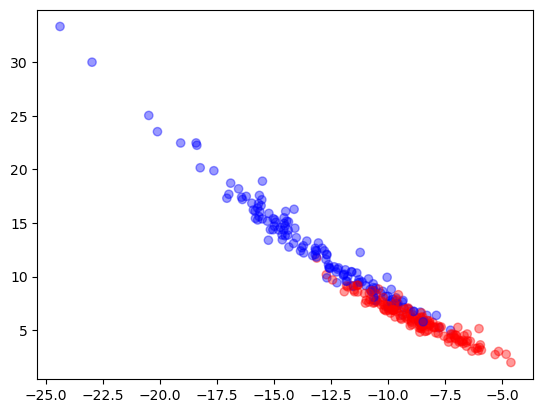

In [4]:
scores1 = y_treino @ pc1
scores2 = y_treino @ pc2
scores3 = y_treino @ pc3
scores4 = y_treino @ pc4
scores5 = y_treino @ pc5
colors = ['blue' if label == 0 else 'red' for label in x_treino]
plt.scatter(scores4, scores5,c=colors, alpha=0.4)

In [5]:
import plotly.express as px
fig = px.scatter_3d(x=scores1, y=scores2, z=scores5, color=colors, opacity=0.4)
fig.update_layout(scene=dict(
    xaxis_title='Score 1',
    yaxis_title='Score 2',
    zaxis_title='Score 5'))
fig.show()

## Dados para o Haskell

In [6]:
for i in range(len(y_teste)):
    print(f'( {y_treino[i][0]}, {y_treino[i][1]}, {y_treino[i][2]}, {y_treino[i][3]}, {y_treino[i][4]}, {x_treino[i]}), ')

( 17.99, 10.38, 122.8, 1001.0, 0.1184, 0), 
( 20.57, 17.77, 132.9, 1326.0, 0.08474, 0), 
( 19.69, 21.25, 130.0, 1203.0, 0.1096, 0), 
( 11.42, 20.38, 77.58, 386.1, 0.1425, 0), 
( 20.29, 14.34, 135.1, 1297.0, 0.1003, 0), 
( 12.45, 15.7, 82.57, 477.1, 0.1278, 0), 
( 18.25, 19.98, 119.6, 1040.0, 0.09463, 0), 
( 13.71, 20.83, 90.2, 577.9, 0.1189, 0), 
( 13.0, 21.82, 87.5, 519.8, 0.1273, 0), 
( 12.46, 24.04, 83.97, 475.9, 0.1186, 0), 
( 16.02, 23.24, 102.7, 797.8, 0.08206, 0), 
( 15.78, 17.89, 103.6, 781.0, 0.0971, 0), 
( 19.17, 24.8, 132.4, 1123.0, 0.0974, 0), 
( 15.85, 23.95, 103.7, 782.7, 0.08401, 0), 
( 13.73, 22.61, 93.6, 578.3, 0.1131, 0), 
( 14.54, 27.54, 96.73, 658.8, 0.1139, 0), 
( 14.68, 20.13, 94.74, 684.5, 0.09867, 0), 
( 16.13, 20.68, 108.1, 798.8, 0.117, 0), 
( 19.81, 22.15, 130.0, 1260.0, 0.09831, 0), 
( 13.54, 14.36, 87.46, 566.3, 0.09779, 1), 
( 13.08, 15.71, 85.63, 520.0, 0.1075, 1), 
( 9.504, 12.44, 60.34, 273.9, 0.1024, 1), 
( 15.34, 14.26, 102.5, 704.4, 0.1073, 0), 
( 21

## Testes Manuais com os $Pesos$

### Foram feitos a acuracia sobre os dados de `teste` na qual não foram treinados pelo algoritmo

Acurácia: 0.9648506151142355


/tmp/ipykernel_32/4062493089.py:28: RuntimeWarning:

overflow encountered in exp

/tmp/ipykernel_32/4062493089.py:4: RuntimeWarning:

overflow encountered in exp



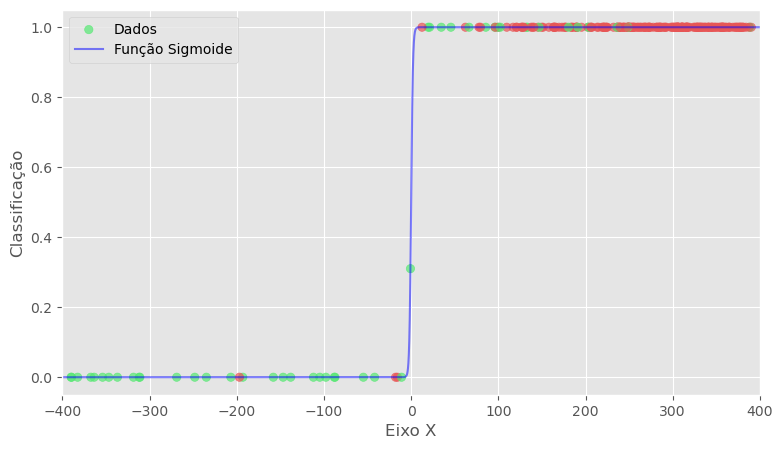

In [7]:
plt.style.use('ggplot')
plt.figure(figsize=(9,5))
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Pesos | eles foram já calculados no haskell
w1 = 3.2831774297364507
w2 = 2.0683092898755584
w3 = 13.187685985405743
w4 = -1.8089015482574466
w5 = 1.0111544562453125
b = 0.3142679562799


erros = 0
xp, xp, i = [], [], 0
yp = []
i = 0
# Para cada item dentro de y_teste
for i in range(len(y_teste)):
    x1 = y_teste[i][0] 
    x2 = y_teste[i][1]
    x3 = y_teste[i][2]
    x4 = y_teste[i][3]
    x5 = y_teste[i][4]
    
    xpp = w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + b
    ypp = 1 / (1 + np.exp(-xpp))
    
    if int(ypp) != x_teste[i]:
        erros += 1
    xp.append(xpp)
    yp.append(ypp)

print(f'Acurácia: {1 - (erros/len(df))}')
colors = ['#56e873' if label == 0 else '#e85656' for label in x_teste]
view = pd.DataFrame({'Raw': xp, 'Previsao': yp, 'Real': colors})

# Gerar valores de x para a função sigmoide
x_sig = np.linspace(min(xp), max(xp), 300000)
y_sig = sigmoid(x_sig)

# Plotar os dados e a função sigmoide
plt.scatter(view['Raw'], view['Previsao'], color=view['Real'], alpha=0.7)
plt.plot(x_sig, y_sig, color='blue', alpha=0.5)
plt.xlabel('Eixo X')
plt.ylabel('Classificação')
plt.legend(['Dados', 'Função Sigmoide'])
plt.xlim(-400, 400)
plt.show();


In [8]:
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


(-10.0, 10.0)

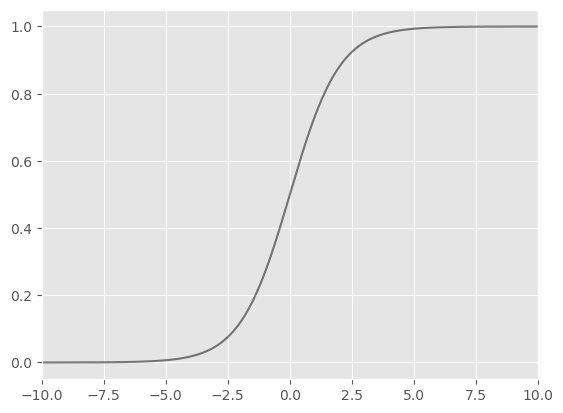

In [9]:
plt.plot(x_sig, y_sig, color='black', alpha=0.5)
plt.xlim(-10, 10)

In [10]:
for i in y_teste:
    print(i)

[1.953e+01 1.890e+01 1.295e+02 1.217e+03 1.150e-01]
[1.246e+01 1.989e+01 8.043e+01 4.713e+02 8.451e-02]
[2.009e+01 2.386e+01 1.347e+02 1.247e+03 1.080e-01]
[1.049e+01 1.861e+01 6.686e+01 3.343e+02 1.068e-01]
[1.146e+01 1.816e+01 7.359e+01 4.031e+02 8.853e-02]
[1.160e+01 2.449e+01 7.423e+01 4.172e+02 7.474e-02]
[1.320e+01 1.582e+01 8.407e+01 5.373e+02 8.511e-02]
[9.000e+00 1.440e+01 5.636e+01 2.463e+02 7.005e-02]
[1.350e+01 1.271e+01 8.569e+01 5.662e+02 7.376e-02]
[1.305e+01 1.384e+01 8.271e+01 5.306e+02 8.352e-02]
[1.170e+01 1.911e+01 7.433e+01 4.187e+02 8.814e-02]
[1.461e+01 1.569e+01 9.268e+01 6.649e+02 7.618e-02]
[1.276e+01 1.337e+01 8.229e+01 5.041e+02 8.794e-02]
[1.154e+01 1.072e+01 7.373e+01 4.091e+02 8.597e-02]
[8.597e+00 1.860e+01 5.409e+01 2.212e+02 1.074e-01]
[1.249e+01 1.685e+01 7.919e+01 4.816e+02 8.511e-02]
[1.218e+01 1.408e+01 7.725e+01 4.614e+02 7.734e-02]
[1.822e+01 1.887e+01 1.187e+02 1.027e+03 9.746e-02]
[9.042e+00 1.890e+01 6.007e+01 2.445e+02 9.968e-02]
[1.243e+01 1